## Exploring Top2Vec on Recipe Topic Generation

Guide here: https://github.com/ddangelov/Top2Vec

#### Notes:
When running Top2Vec with Doc2Vec on the unmodified (only the initial quote and bracket removed from directions; both reformatted into a list of strings) directions and ingredients columns the topics returned were somewhat messy with words like recipe and ingredient sprinkled throughout.

BERT returned far fewer topics on both columns.

Using the "clean" and preprocessed columns, BERT only returned two topics for the ingredients list.

The clean and preprocessed directions column was found to contain nan for some (31 total out of 22k) recipes where the directions were short such as "Mix all the ingredients." and all words were removed during cleaning. There was one instance that numbers were the only characters present for both ingredients and directions. These were removed before running the topic generation model when the column of interest was impacted.

In [1]:
import pandas as pd
from top2vec import Top2Vec

In [2]:
df = pd.read_csv('Recipe_Recommendation/dataset/Recipe_sample_dataset_small_heroclean.csv')

In [3]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [4]:
df.head()

,title,ingredients,directions,link,source,NER,clean_ingredients,clean_directions
0,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]",jar marshmallow creme pkg cream cheese philade...,bring cream cheese room temperature mix marshm...
1,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p...",russet yukon gold potato inch cube low fat m...,place potato large saucepan cover cold water s...
2,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd...",loaf bread dough brown sugar pkg regular van...,loaf bread small piece place piece greased x x...
3,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus...",cream half half large egg pepper salt pork...,preheat oven f spray muffin tin spray like pa...
4,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne...",lean ground beef small onion bean l bean t...,brown ground beef onion fat boil heat simmer ...


In [5]:
df[df['ingredients'].isna()]

,title,ingredients,directions,link,source,NER,clean_ingredients,clean_directions


In [6]:
documents = [x for x in df['ingredients'] if type(x)==str]

In [7]:
documents

['["1 (7 oz.) jar Marshmallow Creme", "1 (8 oz.) pkg. cream cheese (Philadelphia)"]',
 '["1 1/2 lb. russet or Yukon gold potatoes, peeled and cut into 1-inch cubes", "1/2 cup low-fat milk or rice milk", "2 Tbs. butter or margarine", "23 tsp. wasabi paste", "1/2 cup chopped green onions, optional"]',
 '["2 (1 lb.) loaves frozen bread dough, thawed", "1 c. firmly packed brown sugar", "1 pkg. regular vanilla pudding and pie filling mix or 1 pkg. regular butterscotch pie filling mix", "1/2 c. butter or margarine, melted", "1/2 c. milk", "1/2 c. chopped nuts, divided (optional)", "1/2 c. raisins, divided"]',
 '["1/4 cup cream (half & half)", "12 large eggs", "1 tsp pepper", "1 tsp salt", "16 oz pork sausage"]',
 '["2 lb. lean ground beef", "1 small onion, chopped", "1 (16 oz.) can pintos, rinsed and drained", "1 (16 oz.) can kidney beans, rinsed and drained", "l (16 oz.) can lima beans, rinsed and drained", "1 (14 1/2 oz.) can hominy, drained", "3 (14 1/2 oz.) cans stewed tomatoes", "3 (4 o

In [8]:
model = Top2Vec(documents,  ngram_vocab=True)


2022-06-17 09:21:24,262 - top2vec - INFO - Pre-processing documents for training
2022-06-17 09:21:26,004 - top2vec - INFO - Creating joint document/word embedding
2022-06-17 09:22:02,333 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2022-06-17 09:22:16,384 - top2vec - INFO - Finding dense areas of documents
2022-06-17 09:22:17,945 - top2vec - INFO - Finding topics


In [9]:
model.get_num_topics()

217

In [10]:
model.get_topics()

(array([['virgin', 'sprigs', 'leaves', ..., 'capers', 'stalks', 'only'],
        ['whip', 'cool', 'jell', ..., 'strawberry gelatin', 'oreo',
         'eagle brand'],
        ['soy', 'hoisin', 'chinese', ..., 'shallots', 'thai bird',
         'japanese'],
        ...,
        ['land lakes', 'land', 'lakes', ..., 'if you', 'peppermint',
         'applesauce'],
        ['lukewarm water', 'yeast lukewarm', 'cooked until', ...,
         'apricot nectar', 'assorted crackers', 'swiss cheese'],
        ['fully cooked', 'fully', 'ham', ..., 'process', 'sharp',
         'reduced calorie']], dtype='<U22'),
 array([[0.7125531 , 0.70613015, 0.69385934, ..., 0.56743044, 0.56575024,
         0.5637469 ],
        [0.7501664 , 0.7389978 , 0.7297957 , ..., 0.52011013, 0.51946735,
         0.5143814 ],
        [0.7861637 , 0.78125703, 0.7677789 , ..., 0.5351616 , 0.5337666 ,
         0.5320308 ],
        ...,
        [0.9342214 , 0.82734466, 0.7911194 , ..., 0.3573981 , 0.35682613,
         0.35560548],


In [11]:
model.get_topic_sizes()

(array([676, 654, 446, 425, 302, 286, 270, 225, 221, 211, 204, 204, 192,
        185, 184, 182, 180, 172, 170, 167, 165, 160, 159, 159, 156, 155,
        147, 147, 145, 145, 144, 144, 144, 141, 140, 139, 137, 137, 135,
        134, 131, 130, 127, 122, 121, 121, 120, 120, 119, 117, 116, 115,
        115, 114, 114, 112, 111, 110, 109, 109, 109, 109, 109, 108, 108,
        108, 108, 106, 106, 106, 106, 105, 103, 103, 102, 102, 100,  99,
         98,  98,  98,  96,  96,  96,  96,  96,  95,  93,  93,  93,  91,
         91,  90,  90,  90,  89,  89,  89,  88,  88,  88,  87,  87,  86,
         86,  85,  85,  83,  82,  82,  82,  81,  81,  81,  80,  80,  80,
         79,  79,  79,  79,  79,  78,  78,  77,  77,  77,  77,  77,  76,
         76,  76,  75,  75,  75,  74,  74,  74,  73,  73,  73,  73,  72,
         71,  71,  71,  70,  70,  70,  69,  69,  68,  68,  67,  67,  67,
         67,  65,  64,  64,  64,  63,  63,  63,  63,  61,  61,  61,  61,
         60,  60,  60,  60,  60,  60,  59,  59,  59

In [32]:
model.document_vectors

array([[-0.03058413, -0.01699625,  0.05523836, ..., -0.00249344,
        -0.02321933,  0.00898253],
       [-0.04902707,  0.02464362, -0.06151605, ..., -0.05133207,
         0.01278309, -0.09880567],
       [-0.03838213, -0.02761241, -0.01739532, ...,  0.0788573 ,
         0.04426862,  0.04590827],
       ...,
       [-0.08269433,  0.10524148, -0.0396578 , ...,  0.00838121,
         0.06616524,  0.01164344],
       [-0.03090633, -0.01018223,  0.02951281, ..., -0.06793416,
         0.04059885, -0.02640156],
       [ 0.03898106,  0.06661298,  0.13710797, ...,  0.06665467,
         0.05884932,  0.01509591]], dtype=float32)

In [12]:
vectors = model.document_vectors

In [13]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=2, 
                            metric='cosine').fit_transform(model.document_vectors)

In [14]:
len(umap_embeddings)

22311

In [15]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

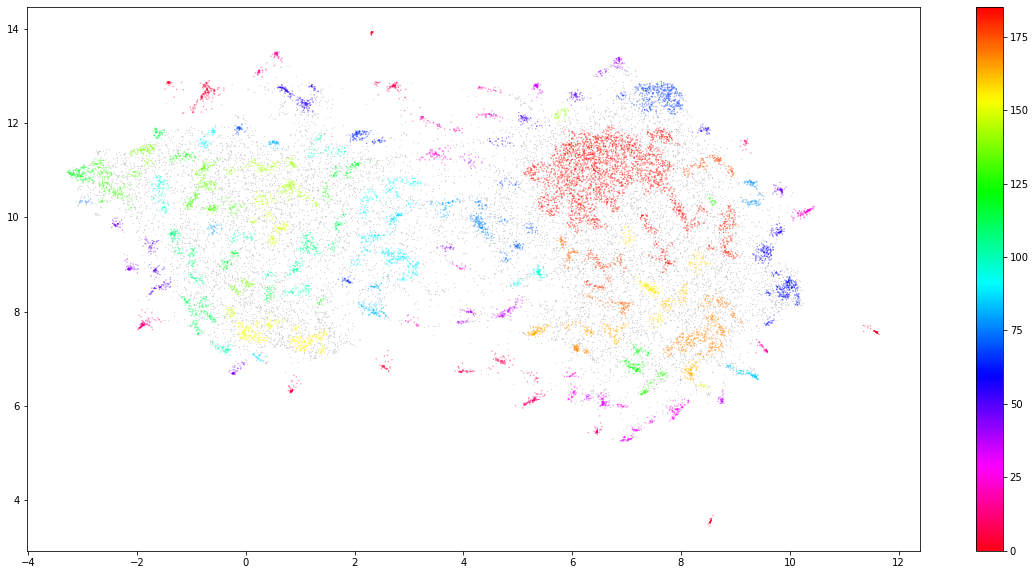

In [16]:
import matplotlib.pyplot as plt

# Prepare data
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [26]:
result.head()

,x,y,labels
0,2.063884,6.426547,7
1,6.566568,12.086987,46
2,0.869241,8.402539,-1
3,8.773838,7.879388,158
4,10.580029,8.894028,108


In [17]:
result.labels.value_counts()

-1      8823
 183    2776
 67      404
 169     365
 128     208
        ... 
 60       16
 10       15
 73       15
 145      15
 121      15
Name: labels, Length: 187, dtype: int64

In [34]:
df_result=pd.concat([df,result],axis=1)

#### Notes

Merging the original data with the dataframe that is producing the above graph to examine different elements.

<br>First it appears there are two large circles left and right. Below it seems that the left are desserts for the most part and the right are savory.



In [45]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

In [38]:
df_result[df_result['x']<4]['clean_ingredients']

0        jar marshmallow creme pkg cream cheese philade...
2         loaf bread dough  brown sugar pkg regular van...
6        lg potato stick butter dash allspice  nutmeg  ...
7         sugar  white vinegar stick cinnamon whole clo...
9            peanut skin  white almond bark chocolate chip
                               ...                        
22300    tbsp cocoa  sugar stick butter margarine  crea...
22301    apple  brown sugar  water  lemon juice  ground...
22302     flour  splenda sugar substitute  apricot sulf...
22305     purpose flour  soda  salt  shortening butter ...
22309     sugar  raw peanut  karo syrup  oleo  vanilla ...
Name: clean_ingredients, Length: 8820, dtype: object

In [39]:
df_result[df_result['x']>6]['clean_ingredients']

1         russet yukon gold potato inch cube  low fat m...
3         cream half half large egg  pepper  salt  pork...
4         lean ground beef small onion bean l bean    t...
8         red kidney bean  salt tbsp peanut canola oil ...
10        fingerling potato inch piece  parsley  chive ...
                               ...                        
22304     plus tbsp sugar  dry mustard  salt  celery sa...
22306    rice paper bowl warm water sprout carrot napa ...
22307     ground beef medium onion egg piece bread brea...
22308     dry elbow macaroni  italian breadcrumb  frenc...
22310    large eggplant   salt  extra virgin olive oil ...
Name: clean_ingredients, Length: 11790, dtype: object

In [48]:
df_result[df_result['labels']==-1]['clean_ingredients'].sample(n=20,random_state=422)

11186                                                                                                                                                                                                                             large box cavatappi  mozzarella  parmesan cheese  raw cow white cheddar  soft goat cheese  milk  half half tbsp large onion clove garlic  pancetta ask thick slice deli  dijon mustard mine shallot dijon  fresh thyme leaf  red pepper flake  flour  nutmeg medium butternut squash longways seed  panko breadcrumb  unsalted butter tbsp  olive oil salt black pepper  pasta water
11665                                                                                                                                                                                                                                                                                                                                                                                                            

In [49]:
df_result[df_result['labels']==190]['clean_ingredients'].sample(n=20,random_state=422)

8328                                                                                                                                                                                                                                        beef broth  bourbon  brown sugar  white wine vinegar thick cut pork chop ground allspice  butter  fresh mint
18963                                                                                                                                             butter  olive oil medium zucchini   garlic minced  medium dry white wine  salmon fillet skin flesh cubed  fresh basil leaf plus garnish  salt  ground black pepper  pappardelle chopped walnut garnish
881                                                                                                                                                                                                                                                                             almond  extra olive oil  chili powder 

#### Hierarchical Topic Reduction


In [18]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=10)

#### Notes:

Started examining different areas of the graph above. Seems like it might be desserts on left and savory on right for the most part. 

Next steps - start examining if the distance between items and the topics they represent makes sense.
<br>Review those marked as outliers
<br>Review the largest topics

<br>Test out inputing a list and returning recipe ideas.

In [19]:
model.topic_words_reduced

array([['leaves', 'trimmed', 'fresh', 'shallots', 'garlic', 'pounds',
        'virgin', 'black', 'olive', 'fish', 'cloves', 'cilantro',
        'crosswise', 'root', 'peeled', 'scallions', 'smashed', 'and',
        'freshly', 'sprigs', 'pound', 'wine', 'minced', 'sea', 'shallot',
        'wedges', 'piece', 'clove', 'leaf', 'red', 'stock', 'oil',
        'thinly', 'lengthwise', 'extra', 'cleaned', 'halved', 'ribs',
        'bunch', 'removed', 'quartered', 'seeded', 'only', 'coarse',
        'about', 'stalks', 'flat', 'pepper', 'peppercorns', 'lengths'],
       ['wafers', 'pudding', 'cool', 'fudge', 'whip', 'whipped', 'eagle',
        'marshmallows', 'graham', 'miniature', 'jell', 'pecans',
        'vanilla', 'carton', 'chocolate', 'powdered', 'bananas',
        'maraschino', 'butterscotch pudding', 'oreo', 'boxes', 'topping',
        'hershey', 'filling', 'sweetened', 'baker angel',
        'whipped topping', 'butterscotch', 'cracker', 'confectioners',
        'karo', 'bars', 'butterscot

In [32]:
model.topic_word_scores_reduced

array([[0.65400016, 0.64357245, 0.6430511 , 0.6365627 , 0.6319772 ,
        0.6234589 , 0.6187035 , 0.60998607, 0.60513914, 0.6009153 ,
        0.59123456, 0.5880622 , 0.5879829 , 0.58453125, 0.5803009 ,
        0.5759488 , 0.5724046 , 0.5707104 , 0.57053626, 0.5669534 ,
        0.56360245, 0.5560304 , 0.5407639 , 0.5402621 , 0.53686666,
        0.53441435, 0.5301211 , 0.528527  , 0.5283885 , 0.5283325 ,
        0.5276388 , 0.52655494, 0.5262363 , 0.5246583 , 0.5198008 ,
        0.5164312 , 0.51568556, 0.5119367 , 0.5099522 , 0.5088962 ,
        0.50868446, 0.5084374 , 0.5082421 , 0.50546   , 0.5048989 ,
        0.5045969 , 0.50425464, 0.50265276, 0.50185317, 0.49710223],
       [0.67489636, 0.67483884, 0.6676464 , 0.6579025 , 0.63212335,
        0.6186508 , 0.6145774 , 0.6054386 , 0.5999694 , 0.5994658 ,
        0.5931964 , 0.5808962 , 0.57244825, 0.56785405, 0.5652404 ,
        0.5632892 , 0.5574627 , 0.5546657 , 0.5534041 , 0.54937124,
        0.5478761 , 0.54355717, 0.5376996 , 0.5

In [22]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=\
                ['pasta', 'basil', 'olive oil', 'cheese', 'tomato', 'mushroom', 'milk'], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    doc_title = df['title'][doc_id]
    doc_ingredients = df['ingredients'][doc_id]
    print(f"Document: {doc_id}, Score: {score}, Title: {doc_title}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 6051, Score: 0.6738012433052063, Title: Artichoke Dip
-----------
["2 cans or jars artichoke hearts", "1 c. mayonnaise", "1 c. Parmesan cheese"]
-----------
["2 cans or jars artichoke hearts", "1 c. mayonnaise", "1 c. Parmesan cheese"]
-----------

Document: 19632, Score: 0.6568089723587036, Title: Angel Hair Fresca
-----------
["8 ounces angel hair pasta", "2 cups fresh broccoli florets", "1 tablespoon butter", "1/2 cup sun-dried tomato pesto"]
-----------
["8 ounces angel hair pasta", "2 cups fresh broccoli florets", "1 tablespoon butter", "1/2 cup sun-dried tomato pesto"]
-----------

Document: 19180, Score: 0.652673602104187, Title: Eggplant Parmesan
-----------
["1 medium size eggplant", "1 c. Parmesan cheese", "Italian bread crumbs", "1 clove garlic, minced", "1/2 tsp. salt", "1/8 tsp. pepper", "1/8 tsp. oregano", "1/2 c. oil", "2 eggs, beaten", "tomato sauce", "grated Mozzarella cheese"]
-----------
["1 medium size eggplant", "1 c. Parmesan cheese", "Italian bread crum